<a href="https://colab.research.google.com/github/MariMurotani/ColabNotebooks/blob/main/IlluminationAdaptiveTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat May 24 03:34:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/IlluminationAdaptiveTransformer

/content/drive/MyDrive/Colab Notebooks/IlluminationAdaptiveTransformer


In [ ]:
!git clone https://github.com/cuiziteng/Illumination-Adaptive-Transformer.git

fatal: destination path 'Illumination-Adaptive-Transformer' already exists and is not an empty directory.


In [ ]:
%cd Illumination-Adaptive-Transformer/IAT_enhance

/content/drive/MyDrive/Colab Notebooks/IlluminationAdaptiveTransformer/Illumination-Adaptive-Transformer/IAT_enhance


In [ ]:
!pip install IQA-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!python img_demo.py --file_name demo_imgs/exposure_demo.JPG --task exposure

In [ ]:
!python img_demo.py --file_name demo_imgs/low_demo.jpg --task enhance

In [ ]:
!python img_demo.py --file_name demo_imgs/exposure_demo.JPG --task exposure

In [ ]:
!python img_demo.py --file_name demo_imgs/living_dark_768.jpg --task enhance

In [ ]:
!python img_demo.py --file_name demo_imgs/room_bright_768.jpg --task exposure

In [ ]:
!python img_demo.py --file_name demo_imgs/normal_room.jpg --task exposure

In [ ]:
!python img_demo.py --file_name demo_imgs/normal_room.jpg --task enhance

In [ ]:
#### 以下で360度結合した場合に左右の画像が繋がるかを確認する

In [ ]:
!pip install opencv-python
!pip install py360convert

In [ ]:
import py360convert
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def generate_cubemap_with_e2p(equi_img, face_size=1024, mode='bilinear'):
    """
    Converts an equirectangular image to a cubemap, where new 'Front' faces +X direction.
    """
    faces = {
        'F': py360convert.e2p(equi_img, 90, 90, 0, (face_size, face_size), in_rot_deg=0, mode=mode),
        'R': py360convert.e2p(equi_img, 90, 180, 0, (face_size, face_size), in_rot_deg=0, mode=mode),
        'B': py360convert.e2p(equi_img, 90, -90, 0, (face_size, face_size), in_rot_deg=0, mode=mode),
        'L': py360convert.e2p(equi_img, 90, 0, 0, (face_size, face_size), in_rot_deg=0, mode=mode),
        'U': py360convert.e2p(equi_img, 90, 90, 90, (face_size, face_size), in_rot_deg=0, mode=mode),
        'D': py360convert.e2p(equi_img, 90, 90, -90, (face_size, face_size), in_rot_deg=0, mode=mode),
    }
    return faces


In [ ]:
def crip_and_concat(input_path):
  # 色スタイルをBGRからRGBに変換
  equi_img = cv2.cvtColor(cv2.imread(input_path), cv2.COLOR_BGR2RGB)
  cubemaps = generate_cubemap_with_e2p(equi_img, face_size=1024, mode='bilinear')

  # 変換（listを渡す）
  equi_img = py360convert.c2e(
      cubemaps,
      h=int(4096/2),
      w=4096,
      mode="bilinear",
      cube_format='dict'
  )
  return equi_img

In [ ]:
def blend_vertical_seam(equi_img, center_x=None, blend_width=64):
    """
    不自然な縦のシーム（継ぎ目）をαブレンドで滑らかにする。
    """
    blended = equi_img.copy().astype(np.float32)
    h, w = blended.shape[:2]
    cx = center_x if center_x is not None else w // 2

    left = blended[:, cx - blend_width:cx]
    right = blended[:, cx:cx + blend_width]

    for i in range(blend_width):
        alpha = i / blend_width
        blended[:, cx - blend_width + i] = (1 - alpha) * right[:, i] + alpha * left[:, i]
        blended[:, cx + i] = alpha * right[:, i] + (1 - alpha) * left[:, i]

    return np.clip(blended, 0, 255).astype(np.uint8)

living_dark_768_result.png


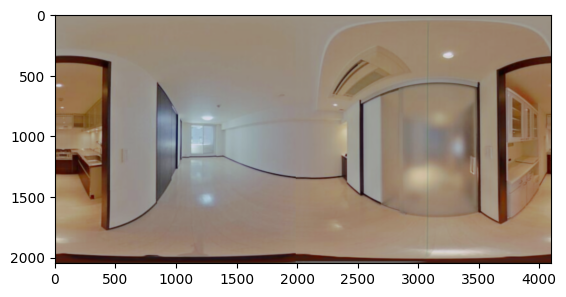

room_bright_768_result.png


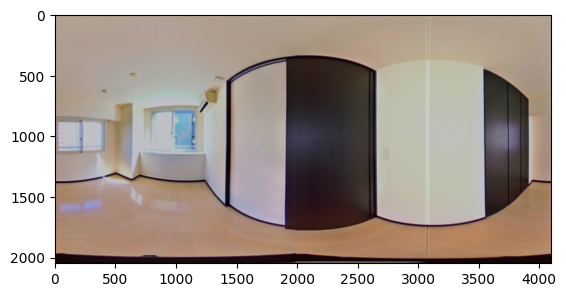

In [ ]:
images = ['living_dark_768_result.png', 'room_bright_768_result.png']

for input_path in images:
  print(input_path)
  equi_img = crip_and_concat(input_path)
  equi_img = blend_vertical_seam(equi_img, center_x=None, blend_width=64)
  plt.imshow(equi_img)
  plt.show()

  file_name = input_path.split('.')[0]
  output_path = file_name + '_result.png'
  plt.imsave(output_path, equi_img)